In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:/Users/DELL/Downloads/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

<Axes: >

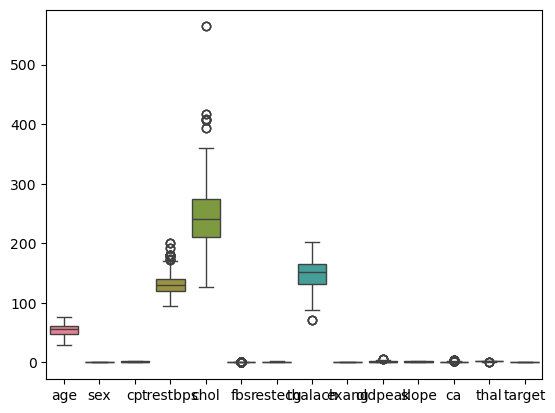

In [6]:
sns.boxplot(df)

In [7]:
num_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [8]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.groupby(['target']).count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,456,456,456,456,456,456,456,456,456,456,456,456,456
1,508,508,508,508,508,508,508,508,508,508,508,508,508


In [11]:
a=df.groupby(['target']).size().reset_index(name='count').rename(columns={'target':'Diseasein'}) # O for healthy and 1 for diseased
a

,Diseasein,count
0,0,456
1,1,508


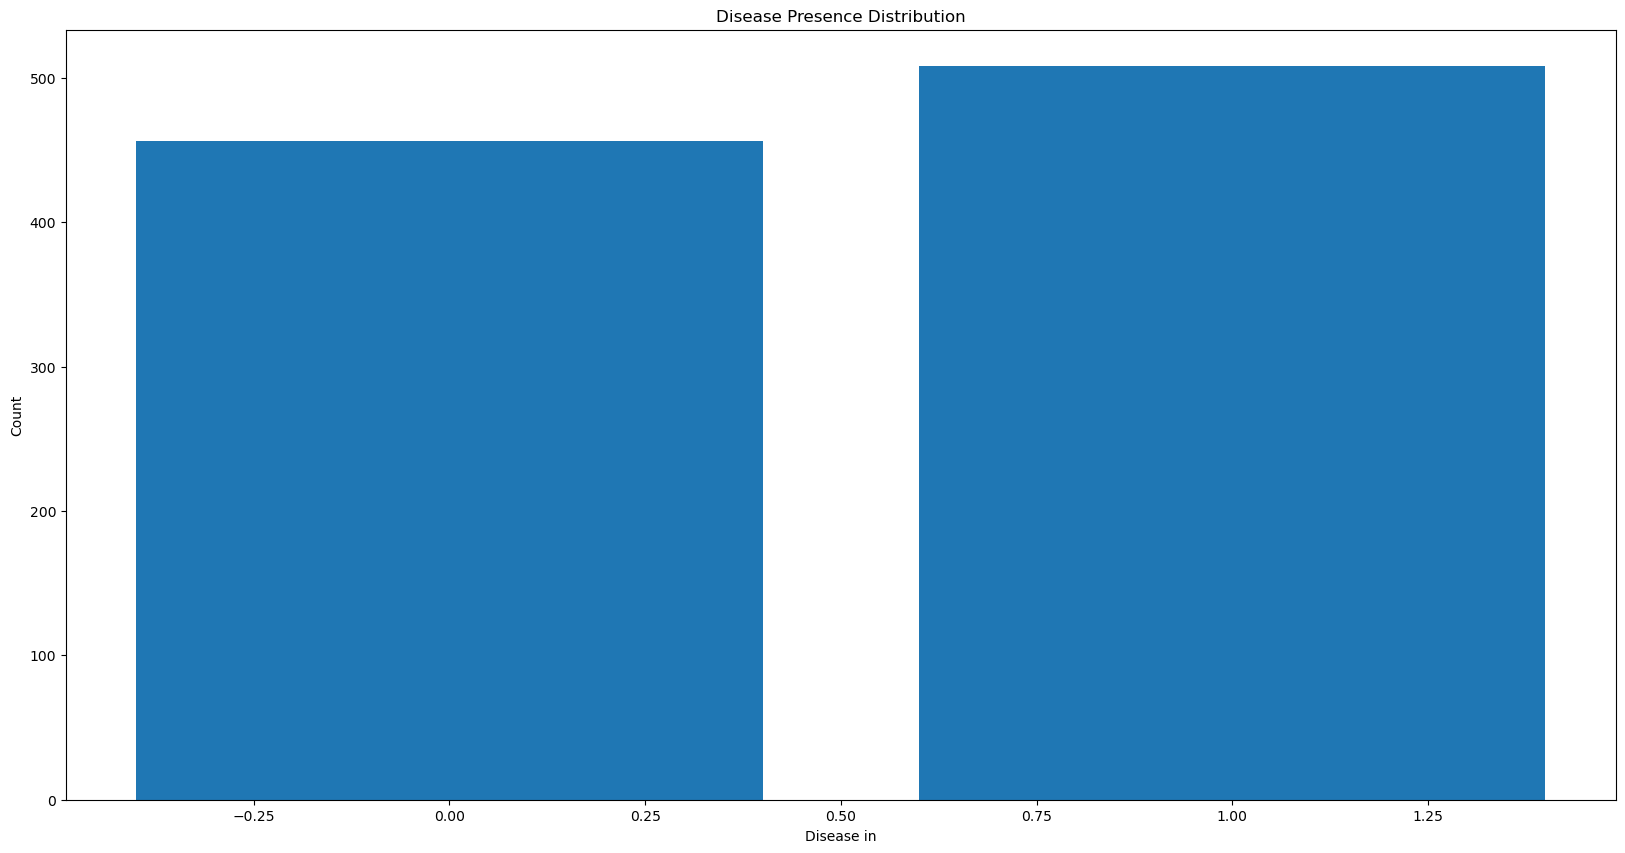

In [12]:
plt.figure(figsize=(20,10))
plt.bar(a['Diseasein'], a['count'])
plt.xlabel('Disease in')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.title('Disease Presence Distribution')  # optional title
plt.show()

(array([  4.,  39., 109., 125., 117., 187., 203., 128.,  43.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

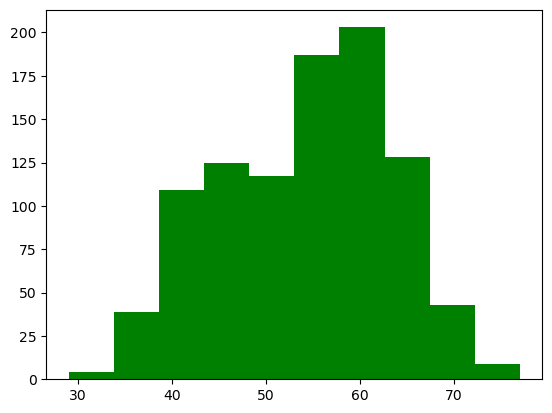

In [13]:
plt.hist(df['age'],bins=10,color='green')

In [14]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [15]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.073993,-0.064323,0.269362,0.187829,0.109329,-0.138529,-0.402295,0.087455,0.205841,-0.153800,0.280354,0.063173
sex,-0.073993,1.000000,-0.081931,-0.002355,-0.123396,0.051455,-0.074475,-0.047625,0.183040,0.149620,-0.055996,0.153932,0.235266
cp,-0.064323,-0.081931,1.000000,0.076465,-0.089317,0.071809,0.082116,0.301058,-0.400875,-0.156566,0.109582,-0.157566,-0.183412
trestbps,0.269362,-0.002355,0.076465,1.000000,0.113626,0.123920,-0.151314,-0.060029,-0.009736,0.133319,-0.077201,0.113774,-0.012197
chol,0.187829,-0.123396,-0.089317,0.113626,1.000000,0.031780,-0.146065,-0.042601,0.087461,0.013200,0.020391,0.066656,0.103657
fbs,0.109329,0.051455,0.071809,0.123920,0.031780,1.000000,-0.100853,-0.025174,0.027136,0.016365,-0.067493,0.139401,-0.078023
restecg,-0.138529,-0.074475,0.082116,-0.151314,-0.146065,-0.100853,1.000000,0.097796,-0.096248,-0.083160,0.112938,-0.078915,0.029587
thalach,-0.402295,-0.047625,0.301058,-0.060029,-0.042601,-0.025174,0.097796,1.000000,-0.396653,-0.355052,0.388970,-0.242853,-0.121452
exang,0.087455,0.183040,-0.400875,-0.009736,0.087461,0.027136,-0.096248,-0.396653,1.000000,0.351351,-0.272164,0.125699,0.195338
oldpeak,0.205841,0.149620,-0.156566,0.133319,0.013200,0.016365,-0.083160,-0.355052,0.351351,1.000000,-0.520796,0.185128,0.196936


<Axes: >

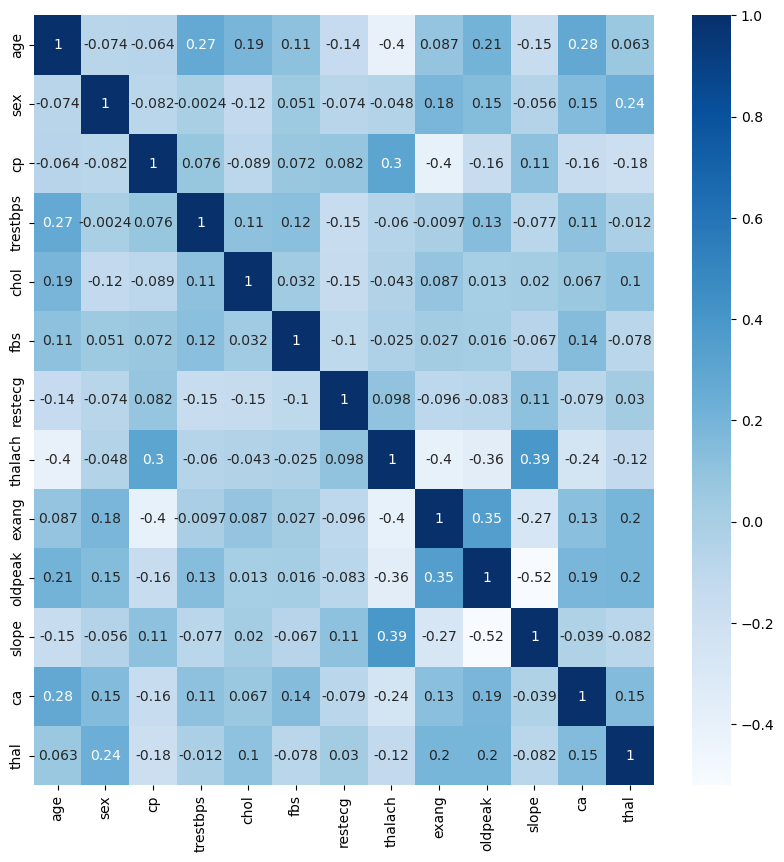

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True,cmap='Blues')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


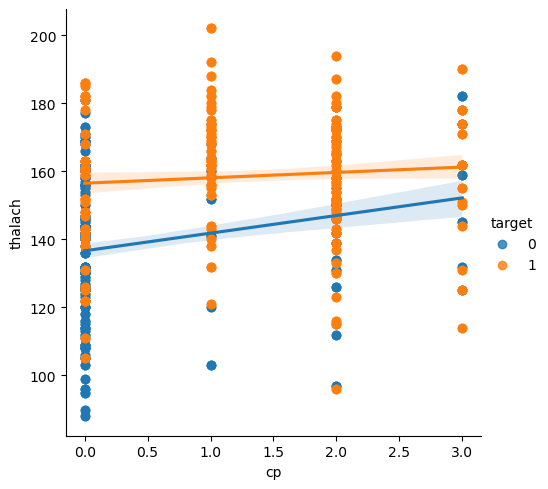

In [17]:
sns.lmplot(x='cp', y='thalach', hue='target', data=df)
plt.show()

In [18]:
x=df.drop(columns=['target'])
y=df['target']
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 964, dtype: int64

In [20]:
from sklearn.feature_selection import f_classif
a=f_classif(x,y)
a

(array([ 52.55650761, 108.13170468, 205.80610771,  11.77302565,
         15.78805862,   1.52622117,  29.0802467 , 213.91321996,
        228.44290963, 239.65858734, 116.19439063, 156.88734103,
        132.67843121]),
 array([8.58053462e-13, 4.48707752e-24, 1.93641102e-42, 6.26516229e-04,
        7.61409501e-05, 2.16982079e-01, 8.74096898e-08, 6.83925686e-44,
        1.81223443e-46, 1.95455095e-48, 1.17560747e-25, 1.88403640e-33,
        7.51015932e-29]))

In [21]:
a=pd.Series(a[1])
a.index=x.columns
a

age         8.580535e-13
sex         4.487078e-24
cp          1.936411e-42
trestbps    6.265162e-04
chol        7.614095e-05
fbs         2.169821e-01
restecg     8.740969e-08
thalach     6.839257e-44
exang       1.812234e-46
oldpeak     1.954551e-48
slope       1.175607e-25
ca          1.884036e-33
thal        7.510159e-29
dtype: float64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [35]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [5,10,15],
    'max_depth': [15,20,25],
    'min_samples_split': [5,7,8]
}

In [36]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy')

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': [5, 7, 8],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [38]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 15}

In [40]:
best_rf=grid_search.best_estimator_

In [41]:
best_rf

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=15)

In [42]:
pred=best_rf.predict(x_test)
accuracy_score(pred,y_test)

0.9749216300940439

In [45]:
confusion_matrix(pred,y_test)

array([[157,   5],
       [  3, 154]], dtype=int64)

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       160
           1       0.98      0.97      0.97       159

    accuracy                           0.97       319
   macro avg       0.98      0.97      0.97       319
weighted avg       0.97      0.97      0.97       319



0.9984496124031008

In [44]:
import joblib
joblib.dump(grid_search,'C:/Users/DELL/Downloads/DA and DS/Advanced mAchine Learning/Heart Data.pkl')

['C:/Users/DELL/Downloads/DA and DS/Advanced mAchine Learning/Heart Data.pkl']